In [4]:
SINGLE_PEERSET_BENCHMARK = "./single_peerset_local_1.csv"
CROSS_PEERSET_BENCHMARK = "./cross_peerset_local_1.csv"


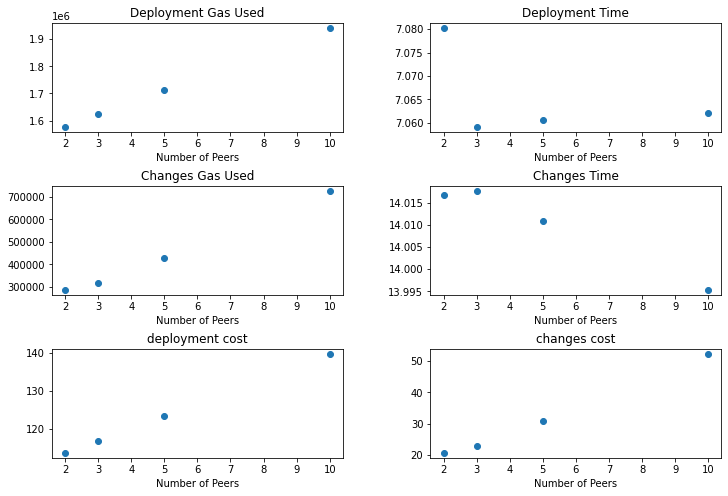

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv(SINGLE_PEERSET_BENCHMARK)
df.columns = [col.strip() for col in df.columns]

# Convert the time columns to floats (in seconds)
df["deployment_time"] = df["deployment_time"].apply(lambda x: float(x[:-1]))
df["changes_time"] = df["changes_time"].apply(lambda x: float(x[:-1]))

# Add columns for deployment and changes cost in USD
gas_price = 40 # gwei
eth_price = 1800 # USD
df['deployment_cost'] = df['deployment_gas_used'] * gas_price * 10**-9 * eth_price
df['changes_cost'] = df['changes_gas_used'] * gas_price * 10**-9 * eth_price


# Plot the variables against the number of peers
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
axs[0, 0].scatter(df["peers_num"], df["deployment_gas_used"])
axs[0, 0].set_title("Deployment Gas Used")
axs[0, 1].scatter(df["peers_num"], df["deployment_time"])
axs[0, 1].set_title("Deployment Time")
axs[1, 0].scatter(df["peers_num"], df["changes_gas_used"])
axs[1, 0].set_title("Changes Gas Used")
axs[1, 1].scatter(df["peers_num"], df["changes_time"])
axs[1, 1].set_title("Changes Time")

axs[2, 0].scatter(df["peers_num"], df["deployment_cost"])
axs[2, 0].set_title("deployment cost")

axs[2, 1].scatter(df["peers_num"], df["changes_cost"])
axs[2, 1].set_title("changes cost")
for ax in axs.flat:
    ax.set(xlabel="Number of Peers")

fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()